In [1]:
import os

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "rnn"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./", fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import tensorflow as tf
tf.__version__
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
plt.rcParams['font.family'] = 'AppleGothic'


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df = pd.read_csv("./only_cell_merge.csv")
df

,Unnamed: 0,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,...,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항15,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항16,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항17,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항18,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항19,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항24
0,1,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,...,0.249,0.247,0.263,0.241,0.249,0.252,0.263,0.260,0.267,0.267
1,2,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,...,0.247,0.247,0.262,0.242,0.250,0.250,0.258,0.257,0.266,0.266
2,3,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,...,0.248,0.247,0.262,0.243,0.250,0.248,0.257,0.256,0.267,0.266
3,4,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,...,0.249,0.248,0.262,0.244,0.249,0.249,0.255,0.259,0.267,0.266
4,5,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,...,0.252,0.249,0.261,0.243,0.247,0.249,0.256,0.259,0.264,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,...,0.279,0.282,0.250,0.251,0.278,0.272,0.275,0.274,0.289,0.286
1396,1397,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,...,0.280,0.283,0.254,0.251,0.278,0.274,0.276,0.274,0.289,0.286
1397,1398,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,...,0.280,0.280,0.257,0.252,0.282,0.273,0.276,0.275,0.288,0.288
1398,1399,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,...,0.279,0.277,0.256,0.251,0.278,0.272,0.275,0.278,0.292,0.288


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df

,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,남청주E3/없음/LTE-1조_셀저항10,...,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항15,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항16,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항17,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항18,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항19,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항24
0,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,0.285,...,0.249,0.247,0.263,0.241,0.249,0.252,0.263,0.260,0.267,0.267
1,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,0.286,...,0.247,0.247,0.262,0.242,0.250,0.250,0.258,0.257,0.266,0.266
2,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,0.285,...,0.248,0.247,0.262,0.243,0.250,0.248,0.257,0.256,0.267,0.266
3,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,0.285,...,0.249,0.248,0.262,0.244,0.249,0.249,0.255,0.259,0.267,0.266
4,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,0.286,...,0.252,0.249,0.261,0.243,0.247,0.249,0.256,0.259,0.264,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,0.297,...,0.279,0.282,0.250,0.251,0.278,0.272,0.275,0.274,0.289,0.286
1396,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,0.297,...,0.280,0.283,0.254,0.251,0.278,0.274,0.276,0.274,0.289,0.286
1397,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,0.298,...,0.280,0.280,0.257,0.252,0.282,0.273,0.276,0.275,0.288,0.288
1398,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,0.298,...,0.279,0.277,0.256,0.251,0.278,0.272,0.275,0.278,0.292,0.288


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
남청주E3/없음/LTE-1조_셀저항1,1400.0,0.336284,0.007020,0.221,0.333,0.337,0.33900,0.353
남청주E3/없음/LTE-1조_셀저항2,1400.0,0.284270,0.007968,0.190,0.279,0.284,0.28800,0.307
남청주E3/없음/LTE-1조_셀저항3,1400.0,0.295559,0.006343,0.193,0.293,0.296,0.29800,0.311
남청주E3/없음/LTE-1조_셀저항4,1400.0,0.306663,0.006576,0.200,0.304,0.307,0.31000,0.339
남청주E3/없음/LTE-1조_셀저항5,1400.0,0.306899,0.007842,0.201,0.303,0.307,0.31100,0.328
...,...,...,...,...,...,...,...,...
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,1400.0,0.272529,0.013297,0.243,0.262,0.276,0.28200,0.304
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,1400.0,0.275679,0.012474,0.249,0.266,0.278,0.28500,0.302
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,1400.0,0.275740,0.012785,0.251,0.265,0.279,0.28600,0.305
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,1400.0,0.288598,0.015224,0.254,0.275,0.294,0.30025,0.316


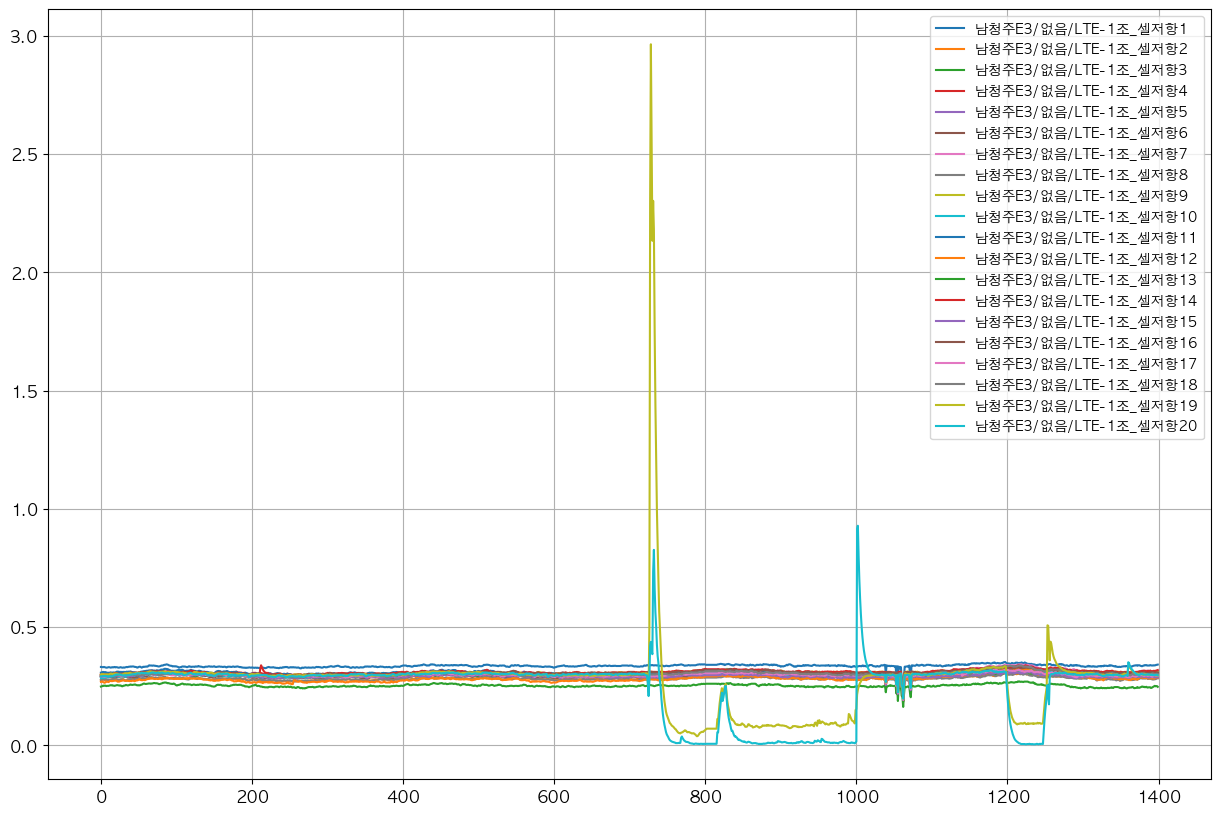

In [10]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,1400), df.iloc[:,:20])
plt.legend(df.columns[:20])
plt.grid()
# plt.rc('font', family='AppleGorhic') 

plt.show()


## 시퀀스 투 시퀀스 모델 생성

In [11]:
# 트레인, 테스트 데이터 셋 생성 함수
def seqRNN_data(data,steps):

  n1 = data.shape[0]
  n2 = data.shape[1]

  X_train = data[:int(n1*0.7), :n2-steps]
  X_valid = data[int(n1*0.7):int(n1*0.9), :n2-steps]
  X_test = data[int(n1*0.9):, :n2-steps]
  Y = Y = np.empty((n1, n2-steps, steps))

  for step_ahead in range(1, steps+1):
      Y[..., step_ahead - 1] = data[..., step_ahead:step_ahead + n2-steps, 0]
  Y_train = Y[:int(n1*0.7)]
  Y_valid = Y[int(n1*0.7):int(n1*0.9)]
  Y_test = Y[int(n1*0.9):]
  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test
  
def df_to_array(df):
  df_array = np.array(df.transpose())
  df_array = df_array.reshape(df_array.shape[0], df_array.shape[1], 1)
  return df_array


In [12]:
df1 = df.iloc[:, :1000]
df1

,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,남청주E3/없음/LTE-1조_셀저항10,...,양재_A_M_5G/없음/TDX-100-1조_셀저항7,양재_A_M_5G/없음/TDX-100-1조_셀저항8,양재_A_M_5G/없음/TDX-100-1조_셀저항9,양재_A_M_5G/없음/TDX-100-1조_셀저항10,양재_A_M_5G/없음/TDX-100-1조_셀저항11,양재_A_M_5G/없음/TDX-100-1조_셀저항12,양재_A_M_5G/없음/TDX-100-1조_셀저항13,양재_A_M_5G/없음/TDX-100-1조_셀저항14,양재_A_M_5G/없음/TDX-100-1조_셀저항15,양재_A_M_5G/없음/TDX-100-1조_셀저항16
0,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,0.285,...,0.159,0.173,0.189,0.167,0.162,0.150,0.151,0.163,0.150,0.164
1,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,0.286,...,0.158,0.174,0.184,0.165,0.164,0.146,0.148,0.161,0.157,0.164
2,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,0.285,...,0.155,0.171,0.185,0.167,0.165,0.143,0.139,0.161,0.159,0.164
3,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,0.285,...,0.152,0.172,0.182,0.168,0.165,0.145,0.138,0.165,0.160,0.166
4,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,0.286,...,0.155,0.173,0.186,0.169,0.166,0.148,0.136,0.163,0.161,0.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,0.297,...,0.163,0.199,0.201,0.178,0.188,0.192,0.204,0.180,0.172,0.176
1396,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,0.297,...,0.165,0.200,0.202,0.179,0.190,0.191,0.195,0.173,0.172,0.172
1397,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,0.298,...,0.167,0.202,0.201,0.180,0.190,0.192,0.187,0.172,0.173,0.174
1398,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,0.298,...,0.163,0.197,0.205,0.181,0.187,0.192,0.194,0.175,0.176,0.176


In [13]:
df_array = df_to_array(df1)
df_array.shape

(1000, 1400, 1)

In [14]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = seqRNN_data(df_array,360)

In [15]:
print(type(X_train))
print(type(Y_train))
print(type(X_valid))
print(type(Y_valid))
print(type(X_test))
print(type(Y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((700, 1040, 1),
 (700, 1040, 360),
 (200, 1040, 1),
 (200, 1040, 360),
 (100, 1040, 1),
 (100, 1040, 360))

In [15]:

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [109]:
# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(1400, return_sequences=True, input_shape=[None, 1]),
#     keras.layers.SimpleRNN(1000, return_sequences=True),
#     keras.layers.SimpleRNN(500, return_sequences=True),
#     # keras.layers.TimeDistributed(keras.layers.Dense(360))
#     keras.layers.Dense(360)
# ])

# def last_time_step_mse(Y_true, Y_pred):
#     return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

# model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01)
# # , metrics=[last_time_step_mse]
# )
# history = model.fit(X_train, Y_train, epochs=50,
#                     validation_data=(X_valid, Y_valid))

Epoch 1/50


2022-09-06 12:53:13.468719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## LSTM


In [18]:

model = keras.models.Sequential([
    keras.layers.LSTM(1400, return_sequences=True, input_shape=[None, 1]),
    # keras.layers.LSTM(20, return_sequences=True, input_shape=[X_train.shape[1], X_train.shape[2]]),
    keras.layers.LSTM(1400, return_sequences=True),
    keras.layers.Dense(720),
    keras.layers.Dense(360)
])

model.compile(loss="mse", optimizer="adam"
# , metrics=[last_time_step_mse]
)
history = model.fit(X_train, Y_train, epochs=50,
                    validation_data=(X_valid, Y_valid))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-06 13:38:26.857034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-06 13:38:26.857139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2022-09-06 13:38:30.382959: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-06 13:38:31.690609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:38:32.009567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:38:35.462192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:38:40.373344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:38:49.067623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 0.2107

2022-09-06 13:41:35.993989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:41:36.137874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 13:41:39.378967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 212s 9s/step - loss: 0.2107 - val_loss: 0.0450
Epoch 2/50
22/22 [==============================] - 176s 8s/step - loss: 0.0255 - val_loss: 0.0242
Epoch 3/50
22/22 [==============================] - 170s 8s/step - loss: 0.0157 - val_loss: 0.0160
Epoch 4/50
22/22 [==============================] - 167s 8s/step - loss: 0.0133 - val_loss: 0.0218
Epoch 5/50
22/22 [==============================] - 170s 8s/step - loss: 0.0145 - val_loss: 0.0211
Epoch 6/50
22/22 [==============================] - 156s 7s/step - loss: 0.0141 - val_loss: 0.0189
Epoch 7/50
12/22 [===============>..............] - ETA: 1:04 - loss: 0.0092

In [103]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plt.plot(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual",  markersize=3)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=3)
    plt.axis([0, n_steps + ahead, 0, 0.5])
    plt.legend(fontsize=14)
    plt.show()

In [104]:
X_new = np.array(df.iloc[:,1])[:].reshape(1,1400,1)
Y_new = np.array(df.iloc[:,1])[-360:].reshape(1,360,1)

In [73]:
# X_new.shape, Y_new.shape, Y_pred.shape

7/7 [==============================] - 3s 341ms/step - loss: 0.0041
0.004100651014596224


2022-09-06 12:50:42.415538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 12:50:42.527362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-06 12:50:46.951532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


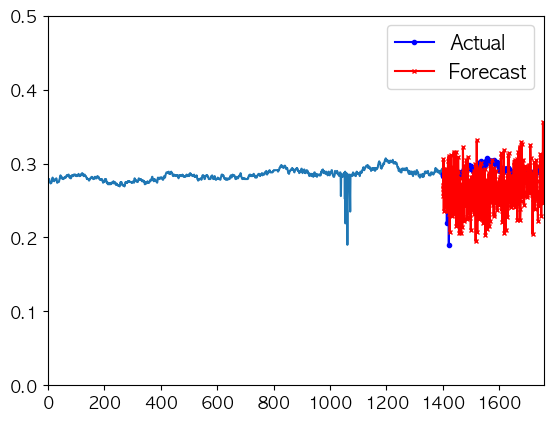

In [105]:
print(model.evaluate(X_valid, Y_valid))
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plt.figure(figsize=(10,5))
plot_multiple_forecasts(X_new, Y_new, Y_pred)

# plt.plot(X_new[0, :, 0])
# plt.plot(np.arange(1400, 1760), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=3)
# plt.axis([0, 2000, 0, 0.5])
# plt.legend(fontsize=14)
# plt.show()

### 단순 선형

In [82]:
#심플 RNN 데이터셋 나누기
def simRNN_data(data,steps):
    n1 = data.shape[0]
    n2 = data.shape[1]
    X_train, Y_train = data[:int(n1*0.7), :n2-steps], data[:int(n1*0.7), -steps:, 0]
    X_valid, Y_valid = data[int(n1*0.7):int(n1*0.9), :n2-steps], data[int(n1*0.7):int(n1*0.9), -steps:, 0]
    X_test, Y_test = data[int(n1*0.9):, :n2-steps], data[int(n1*0.9):, -steps:, 0]
    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [83]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = simRNN_data(df_array, 360)
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((700, 1040, 1),
 (700, 360),
 (200, 1040, 1),
 (200, 360),
 (100, 1040, 1),
 (100, 360))

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X_train.shape[1], 1]),
    keras.layers.Dense(360)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=50,
                    validation_data=(X_valid, Y_valid))

Epoch 1/50
13/22 [================>.............] - ETA: 0s - loss: 0.0424

2022-09-06 12:31:09.975082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 9ms/step - loss: 0.0533 - val_loss: 0.0282
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.0188
Epoch 3/50
 1/22 [>.............................] - ETA: 0s - loss: 0.0018

2022-09-06 12:31:10.191044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0174
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0175
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0168
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0161
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0157
Epoch 8/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0162
Epoch 9/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0157
Epoch 10/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0160
Epoch 11/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0153
Epoch 12/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0170
Epoch 13/50
22/22 [=========

In [93]:
def plot_graph(model,x, y, y_pred):
    plt.figure(figsize=(10,5))      
    plt.plot(np.arange(0,x.shape[1]), x[0,:,0])
    plt.plot(np.arange(x.shape[1], x.shape[1]+y.shape[1]), y[0, :], "bo-", label="Actual")
    plt.plot(np.arange(x.shape[1], x.shape[1]+y.shape[1]), y_pred[0, :], "rx-", label="Forecast", markersize=5)
    plt.axis([0, x.shape[1]+400, 0, 0.5])
    plt.grid()
    plt.title(model)
    plt.legend()
    plt.tight_layout()
    # plt.savefig("./"+model+".png")
    plt.show()

In [94]:
X_valid.shape, Y_valid.shape, Y_pred.shape

((200, 1040, 1), (200, 360), (1, 360))

In [98]:
X_new = np.array(df.iloc[:,0])[:-360].reshape(1,1040,1)
Y_new = np.array(df.iloc[:,0])[-360:].reshape(1,360)

1/1 [==============================] - 0s 13ms/step


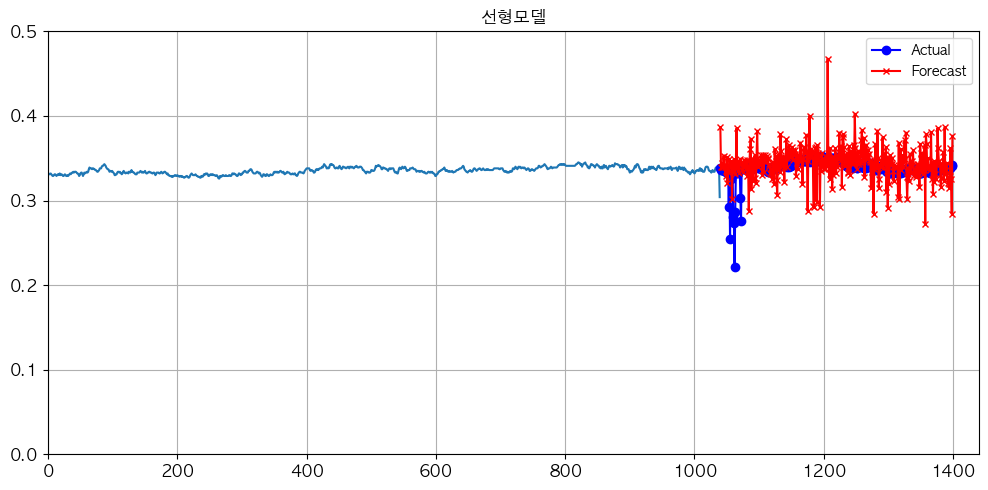

In [99]:
Y_pred = model.predict(X_new)
plot_graph("선형모델", X_new, Y_new, Y_pred)

In [16]:
df

,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,남청주E3/없음/LTE-1조_셀저항10,...,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항15,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항16,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항17,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항18,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항19,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항24
0,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,0.285,...,0.249,0.247,0.263,0.241,0.249,0.252,0.263,0.260,0.267,0.267
1,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,0.286,...,0.247,0.247,0.262,0.242,0.250,0.250,0.258,0.257,0.266,0.266
2,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,0.285,...,0.248,0.247,0.262,0.243,0.250,0.248,0.257,0.256,0.267,0.266
3,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,0.285,...,0.249,0.248,0.262,0.244,0.249,0.249,0.255,0.259,0.267,0.266
4,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,0.286,...,0.252,0.249,0.261,0.243,0.247,0.249,0.256,0.259,0.264,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,0.297,...,0.279,0.282,0.250,0.251,0.278,0.272,0.275,0.274,0.289,0.286
1396,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,0.297,...,0.280,0.283,0.254,0.251,0.278,0.274,0.276,0.274,0.289,0.286
1397,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,0.298,...,0.280,0.280,0.257,0.252,0.282,0.273,0.276,0.275,0.288,0.288
1398,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,0.298,...,0.279,0.277,0.256,0.251,0.278,0.272,0.275,0.278,0.292,0.288


In [ ]:
df = pd.read

In [72]:
X_train.shape

(700, 1040, 1)